---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    # Your code here
    data = pd.read_csv("fraud_data.csv")
    fraud_rate = (data['Class']==1).sum() / len(data['Class'])
    
    return fraud_rate
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    # Your code here
    dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    y_predict = dummy_model.predict(X_test)
    accuracy_score = accuracy_score(y_test, y_predict)
    recall_score = recall_score(y_test, y_predict)
    
    return accuracy_score, recall_score
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score, accuracy_score
    from sklearn.svm import SVC

    # Your code here
    svm_model = SVC().fit(X_train, y_train)
    y_predict = svm_model.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict)
    rec_score = recall_score(y_test, y_predict)
    pre_score = precision_score(y_test, y_predict)
    
    return acc_score, rec_score, pre_score
answer_three()

(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(kernel='rbf', C=1e9 , gamma=1e-07)
    y_scores_svm = svm.fit(X_train, y_train).decision_function(X_test)
    y_threshold = [1 if x >= -220.0 else 0 for x in y_scores_svm]
    confusion = confusion_matrix(y_test, y_threshold)
    
    return confusion 
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [7]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    #import matplotlib.pyplot as plt

    y_predictions_logReg = LogisticRegression().fit(X_train, y_train).predict_proba(X_test)
    y_predictions_probs = [x[1] for x in y_predictions_logReg]
    precision, recall, _ = precision_recall_curve(y_test, y_predictions_probs)
    FP_rate_logReg, TP_rate_logReg, _ = roc_curve(y_test, y_predictions_probs)
    recall_vals = [r for p, r in zip(precision, recall) if p==0.75]
    rate_vals = [t for f, t in zip(FP_rate_logReg, TP_rate_logReg) if f>0.15]
#     plt.figure()
#     plt.xlim([0.0, 1.01])
#     plt.ylim([0.0, 1.01])
#     plt.plot(precision, recall, label='Precision-Recall Curve')
#     plt.plot(FP_rate_logReg, TP_rate_logReg)

    recall = recall_vals[0]
    true_pos_rate = rate_vals[0]
    return recall, true_pos_rate
answer_five()

(0.825, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    import numpy as np

    # Your code here
    log_model = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    grid_model_recall = GridSearchCV(log_model, param_grid = grid_values, scoring='recall')
    grid_model_recall.fit(X_train, y_train)
    mean_scores = grid_model_recall.cv_results_['mean_test_score']
    a, b, c, d, e, f, g, h, i, j = mean_scores
    scores_matrix = np.array([
        [a, b],
        [c, d],
        [e, f],
        [g, h],
        [i, j],
    ])
    
    return scores_matrix
answer_six()

array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ],
       [0.80797101, 0.80797101]])

<IPython.core.display.Javascript object>


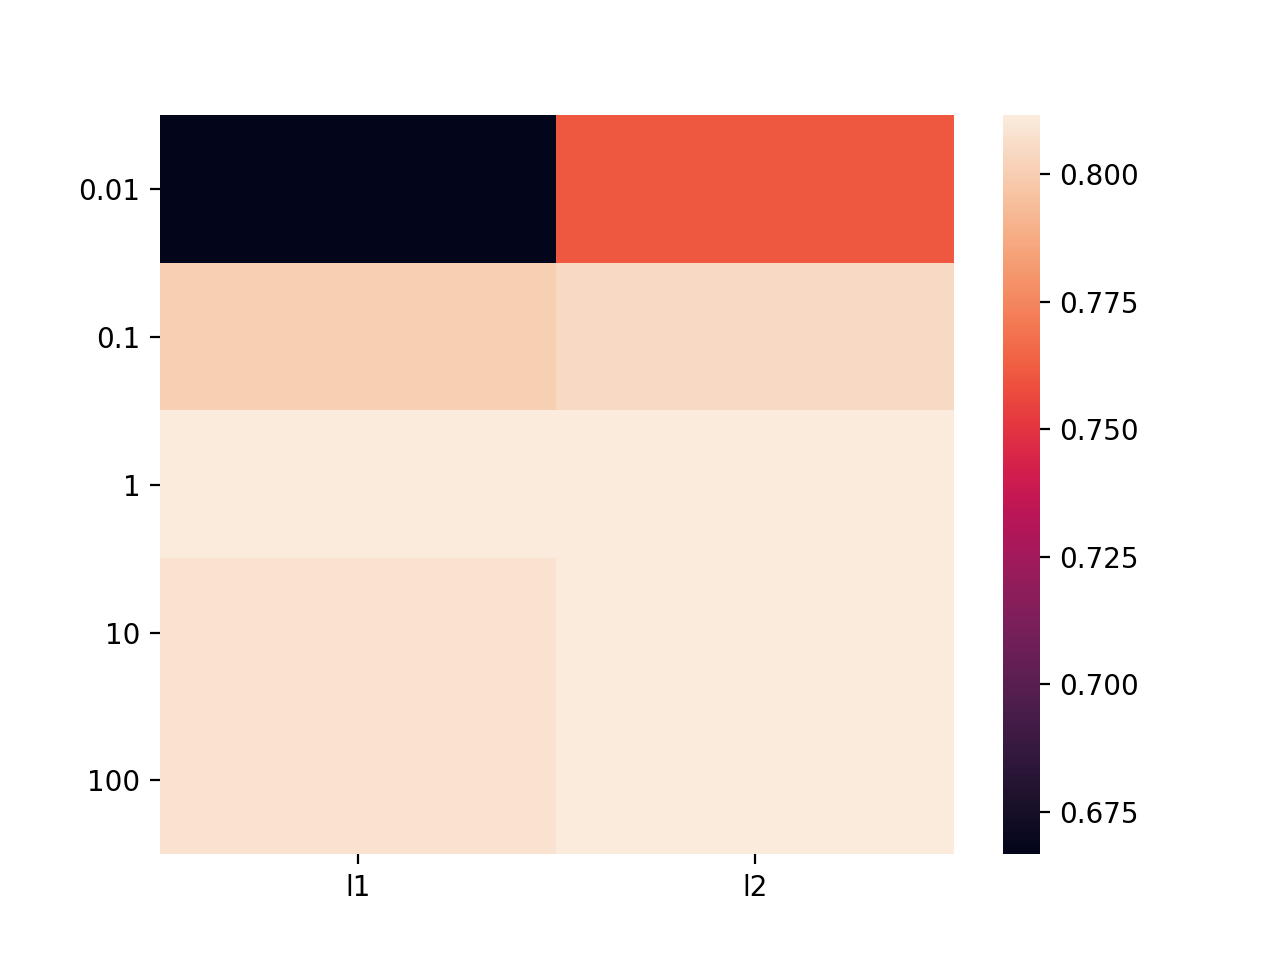

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())